## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

sns.set()

## Getting the Data

In [2]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip -O ../data/iris.zip
!unzip -o ../data/iris.zip -d ../data/iris

--2023-08-24 23:00:23--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘../data/iris.zip’

../data/iris.zip        [ <=>                ]   3.65K  --.-KB/s    in 0.004s  

2023-08-24 23:00:23 (1010 KB/s) - ‘../data/iris.zip’ saved [3738]

Archive:  ../data/iris.zip
  inflating: ../data/iris/Index      fchmod (file attributes) error: Operation not permitted
 (warning) cannot set modif./access times
          Operation not permitted
  inflating: ../data/iris/bezdekIris.data  fchmod (file attributes) error: Operation not permitted
 (warning) cannot set modif./access times
          Operation not permitted
  inflating: ../data/iris/iris.data  fchmod (file attributes) error: Operation not permitted
 (warning) cannot set modif./access times
         

In [3]:
df = pd.read_csv(
    '../data/iris/iris.data',
    header=None,
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploring the Data

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


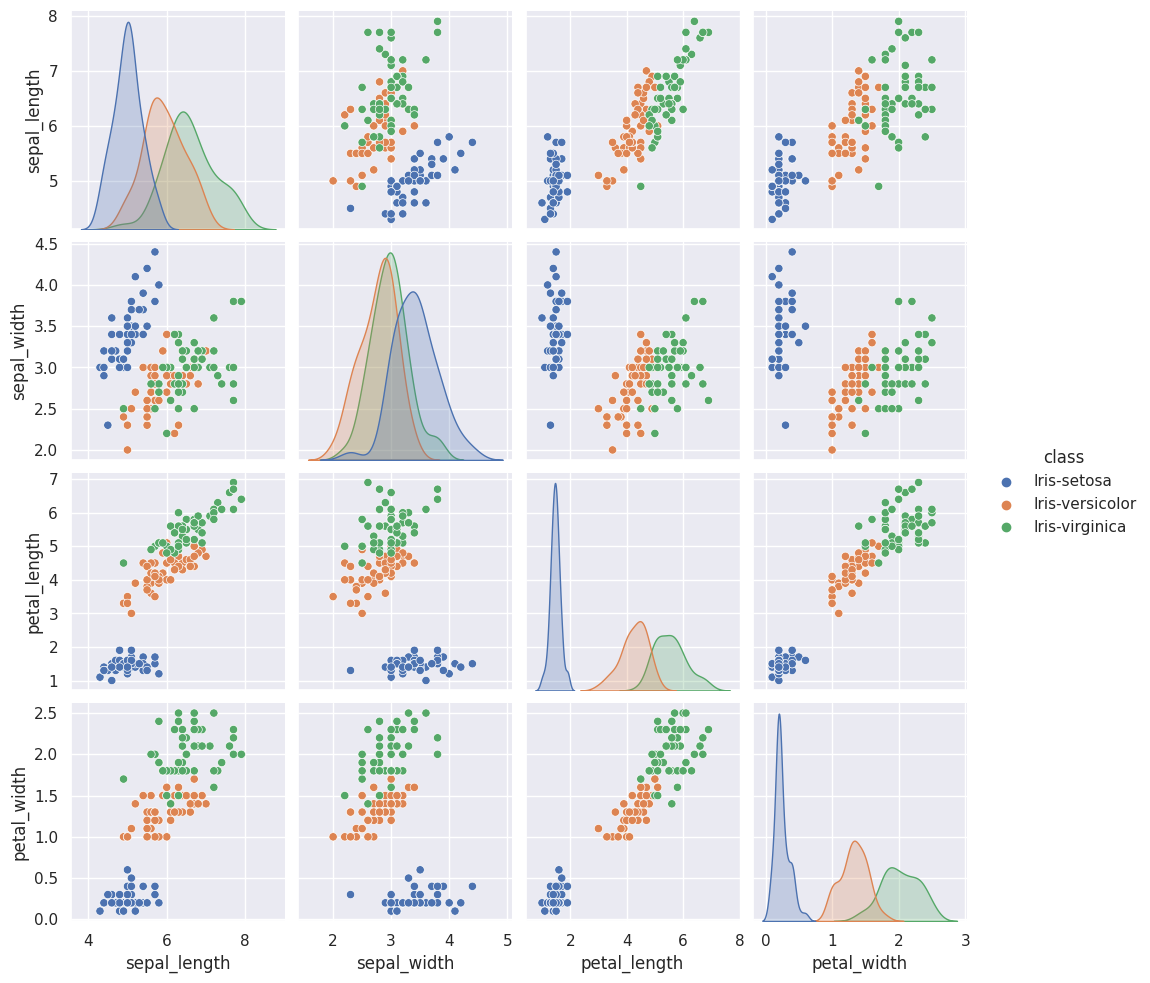

In [5]:
sns.pairplot(df, hue='class');

## Model Building

In [6]:
# Convert to numerical representation
class_names = df['class'].astype('category').cat.categories.values
df['class'] = df['class'].astype('category').cat.codes

In [7]:
X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [8]:
classifier = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

